In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('train_titanic.csv')
test = pd.read_csv('test_titanic.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
num_df = train[['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']]

# EDA

# **Numeric**

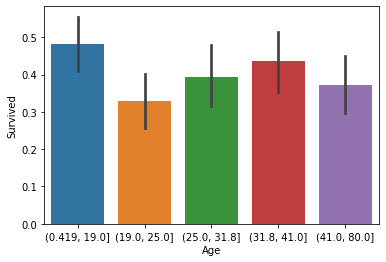

In [ ]:
# Survival rate of younglings is high
sns.barplot(data=train, x=pd.qcut(train['Age'],5), y='Survived')

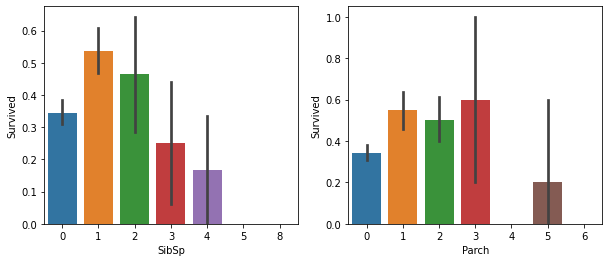

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.barplot(data=train, x='SibSp', y='Survived', ax=axes[0])
sns.barplot(data=train, x='Parch', y='Survived', ax=axes[1])

# 1-2 sibling is good, 3 parch is also good

In [ ]:
testingDf = train.copy()
testingDf['family_number'] = testingDf['SibSp'] + testingDf['Parch']

testingDf['is_alone'] = testingDf['family_number'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
testingDf['is_alone'].value_counts()

1    537
0    354
Name: is_alone, dtype: int64

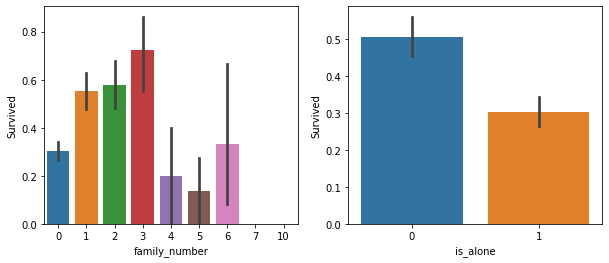

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.barplot(data=testingDf, x='family_number', y='Survived', ax=axes[0])
sns.barplot(data=testingDf, x='is_alone', y='Survived', ax=axes[1])

# 0 family number is bad, 1-3 is great, more than 3 is terrible
# is_alone maybe will be useful

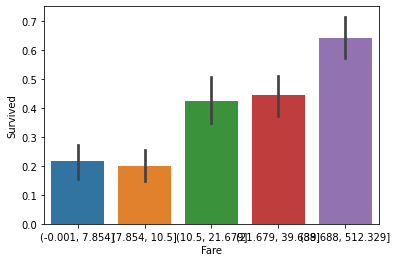

In [ ]:
sns.barplot(data=train, x=pd.qcut(train['Fare'],5), y='Survived')

# more $$$ more safe

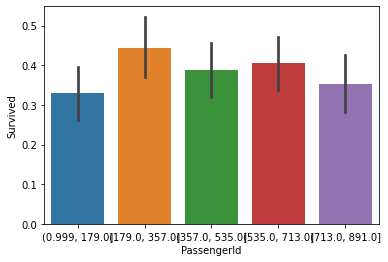

In [ ]:
sns.barplot(data=train, x=pd.qcut(train['PassengerId'],5), y='Survived')

# will be useful?

# **Categorical**

In [ ]:
cat_df = train[['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

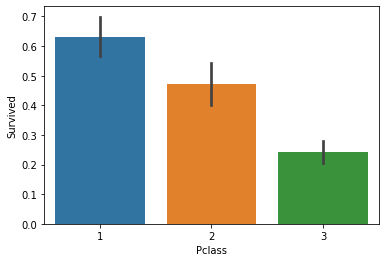

In [ ]:
sns.barplot(data=train, x='Pclass', y='Survived')

# higher class mostly safe

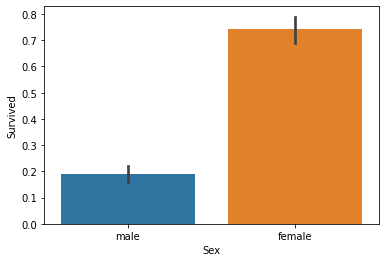

In [ ]:
sns.barplot(data=train, x='Sex', y='Survived')

# one of the great feature?

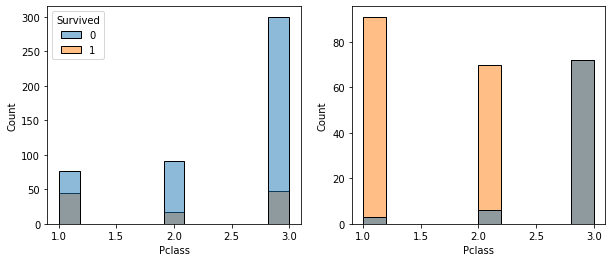

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

male = train[train['Sex'] == 'male']
sns.histplot(male, hue='Survived', x='Pclass', ax=axes[0])

female = train[train['Sex'] == 'female']
sns.histplot(female, hue='Survived', x='Pclass', ax=axes[1], legend=False)

In [ ]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [ ]:
testing = train.copy()
testing['ticket_len'] = testing['Ticket'].apply(lambda x: len(x))

In [ ]:
testing['ticket_len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: ticket_len, dtype: int64

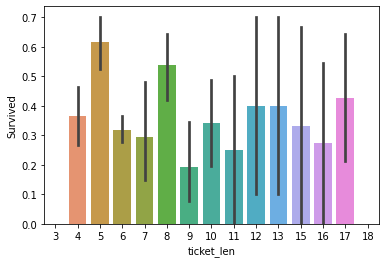

In [ ]:
sns.barplot(data=testing, x='ticket_len', y='Survived')

# useful?

In [ ]:
train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
F33            3
              ..
D48            1
D10 D12        1
C82            1
B4             1
D45            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
testing = train.copy()
testing['cabin_letter'] = testing['Cabin'].apply(lambda x: str(x)[0])

In [ ]:
testing['cabin_letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64

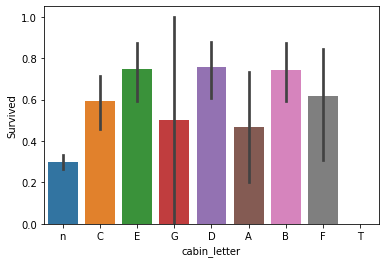

In [ ]:
sns.barplot(data=testing, x='cabin_letter', y='Survived')

# useful?

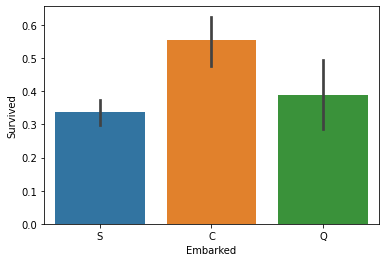

In [ ]:
sns.barplot(data=train, x='Embarked', y='Survived')

In [ ]:
testing = train.copy()
testing['name_len'] = testing['Name'].apply(lambda x: len(x))

In [ ]:
pd.qcut(testing['name_len'],3)

0        (22.0, 28.0]
1        (28.0, 82.0]
2      (11.999, 22.0]
3        (28.0, 82.0]
4        (22.0, 28.0]
            ...      
886    (11.999, 22.0]
887      (22.0, 28.0]
888      (28.0, 82.0]
889    (11.999, 22.0]
890    (11.999, 22.0]
Name: name_len, Length: 891, dtype: category
Categories (3, interval[float64]): [(11.999, 22.0] < (22.0, 28.0] < (28.0, 82.0]]

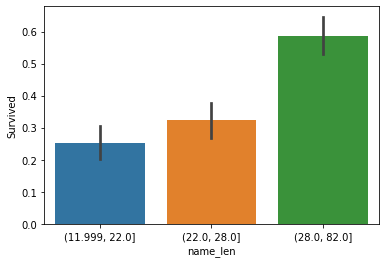

In [ ]:
sns.barplot(data=testing, x=pd.qcut(testing['name_len'],3), y='Survived')

# wow

# **Feature Engineering**

In [ ]:
def getNameLen(train, test):
  data = [train, test]
  for dataset in data:
    dataset['name_len'] = dataset['Name'].apply(lambda x: len(x))
    dataset['name_len'] = pd.qcut(dataset['name_len'],3, labels=['short', 'medium', 'long'])
  return train, test 

def getTitle(train, test):
    for i in [train, test]:
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

def passenger_id(train,test):
  for dataset in [train,test]:
    dataset['passenger_group'] = pd.qcut(dataset['PassengerId'],5, labels=['first', 'second', 'third', 'fourth', 'fifth'])
    del dataset['PassengerId']
  return train, test

def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Cabin_Letter', 'Name_Title', 'Fam_Size', 'name_len', 'passenger_group']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train = pd.read_csv('train_titanic.csv')
test = pd.read_csv('test_titanic.csv')

train, test = getNameLen(train,test)
train, test = getTitle(train,test)
train, test = age_impute(train,test)
train, test = fam_size(train,test)
train, test = ticket_grouped(train,test)
train, test = cabin(train,test)
train, test = embarked_impute(train,test)
train, test = passenger_id(train,test)

test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,name_len,Name_Title,Age_Null_Flag,Fam_Size,Ticket_Len,Cabin_Letter,passenger_group
0,0,3,male,22.0,7.2500,S,medium,Mr.,0,Nuclear,9,n,first
1,1,1,female,38.0,71.2833,C,long,Mrs.,0,Nuclear,8,C,first
2,1,3,female,26.0,7.9250,S,short,Miss.,0,Solo,16,n,first
3,1,1,female,35.0,53.1000,S,long,Mrs.,0,Nuclear,6,C,first
4,0,3,male,35.0,8.0500,S,medium,Mr.,0,Solo,6,n,first


In [ ]:
train, test = dummies(train,test)

In [ ]:
train.head()

,Survived,Age,Fare,Age_Null_Flag,Ticket_Len,Pclass_3,Pclass_1,Pclass_2,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q,Cabin_Letter_n,Cabin_Letter_C,Cabin_Letter_E,Cabin_Letter_G,Cabin_Letter_D,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_F,Name_Title_Mr.,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big,name_len_medium,name_len_long,name_len_short,passenger_group_first,passenger_group_second,passenger_group_third,passenger_group_fourth,passenger_group_fifth
0,0,22.0,7.2500,0,9,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,1,38.0,71.2833,0,8,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2,1,26.0,7.9250,0,16,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
3,1,35.0,53.1000,0,6,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,35.0,8.0500,0,6,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0


In [ ]:
all_data = pd.concat([train,test])

In [ ]:
y_train = train['Survived']
X_train = train.copy()
del X_train['Survived']
X_test = test.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[['Age','Fare']]= scale.fit_transform(X_train_scaled[['Age', 'Fare']])

In [ ]:
X_test_scaled = X_test.copy()
X_test_scaled[['Age','Fare']]= scale.fit_transform(X_test_scaled[['Age', 'Fare']])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66480447 0.43258427 0.38764045 0.41573034 0.64606742]
0.5093653882367711


In [ ]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75418994 0.73033708 0.80898876 0.84269663 0.87640449]
0.8025233820852427


In [ ]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75418994 0.73033708 0.80898876 0.84269663 0.87640449]
0.8025233820852427


In [ ]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.68715084 0.79775281 0.76966292 0.76966292 0.74719101]
0.754284100182035


In [ ]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.68715084 0.79775281 0.76404494 0.76966292 0.74719101]
0.753160504676417


In [ ]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66480447 0.6741573  0.73033708 0.74157303 0.73033708]
0.7082417927311531


In [ ]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75418994 0.82022472 0.8258427  0.8258427  0.84269663]
0.8137593371414225


In [ ]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83798883 0.80898876 0.8258427  0.80337079 0.85393258]
0.8260247316552635


In [ ]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83798883 0.80898876 0.8258427  0.80337079 0.85955056]
0.8271483271608814


In [ ]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83240223 0.82022472 0.82022472 0.7752809  0.83146067]
0.8159186491745652


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82122905 0.81460674 0.85955056 0.80337079 0.85393258]
0.8305379448873266


In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft')

cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7877095  0.79213483 0.82022472 0.84269663 0.86516854]
0.8215868432615656


In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'hard')

cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7877095  0.8258427  0.8258427  0.8258427  0.85955056]
0.8249576297784195


In [ ]:
voting_clf.fit(X_train_scaled,y_train)

predictions = voting_clf.predict(X_test_scaled)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv('test_titanic.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv(('final.csv'), sep=",", index = False)

# **Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

#simple performance reporting function
def clf_performance(classifier, model_name):
    print("\n" + model_name)
    print('Best Score: ' + str(classifier.best_score_ * 100))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



Logistic Regression
Best Score: 82.7185989580064
Best Parameters: {'C': 0.23357214690901212, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



KNN
Best Score: 82.04695248258113
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    4.1s finished


In [ ]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 20.6min



SVC
Best Score: 83.27474734793799
Best Parameters: {'C': 10, 'degree': 2, 'kernel': 'poly'}


[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed: 25.3min finished


In [ ]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 17.6min finished



Random Forest
Best Score: 83.61308141359613
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 550}


In [ ]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [10],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

In [ ]:
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 18.7min finished



XGB
Best Score: 84.73604921222773
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 2, 'learning_rate': 0.5, 'max_depth': 10, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.65}


In [ ]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

In [ ]:
voting_clf = VotingClassifier(estimators = [('lr',best_lr),('knn',best_knn),('svc',best_svc),('rf',best_rf),('xgb',best_xgb)], voting = 'hard')

cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8547486  0.81460674 0.82022472 0.8258427  0.85955056]
0.8349946644906158


In [ ]:
voting_clf.fit(X_train_scaled,y_train)

predictions = voting_clf.predict(X_test_scaled)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv('test_titanic.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv(('voting_tuning_soft.csv'), sep=",", index = False)

In [ ]:
voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean())

voting_clf_hard : [0.77653631 0.81460674 0.78089888 0.80337079 0.8258427 ]
voting_clf_hard mean : 0.8002510827945516
voting_clf_soft : [0.75418994 0.82022472 0.83707865 0.81460674 0.85393258]
voting_clf_soft mean : 0.8137593371414225
voting_clf_all : [0.7877095  0.82022472 0.81460674 0.8258427  0.84831461]
voting_clf_all mean : 0.8182223338145753
voting_clf_xgb : [0.79329609 0.83146067 0.8258427  0.83707865 0.87078652]
voting_clf_xgb mean : 0.8316929257422636


In [ ]:
voting_clf_hard.fit(X_train_scaled,y_train)

predictions = voting_clf_hard.predict(X_test_scaled)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv('test_titanic.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv(('voting_clf_hard.csv'), sep=",", index = False)

voting_clf_soft.fit(X_train_scaled,y_train)

predictions = voting_clf_soft.predict(X_test_scaled)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv('test_titanic.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv(('voting_clf_soft.csv'), sep=",", index = False)

voting_clf_all.fit(X_train_scaled,y_train)

predictions = voting_clf_all.predict(X_test_scaled)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv('test_titanic.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv(('voting_clf_all.csv'), sep=",", index = False)

voting_clf_xgb.fit(X_train_scaled,y_train)

predictions = voting_clf_xgb.predict(X_test_scaled)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv('test_titanic.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv(('voting_clf_xgb.csv'), sep=",", index = False)

In [ ]:
gbm = XGBClassifier(colsample_bytree =  0.8, gamma =  2, learning_rate = 0.5, max_depth = 10, min_child_weight = 0.01, n_estimators = 550, reg_alpha = 1, reg_lambda = 5, sampling_method = ['uniform'], subsample = 0.65)
gbm.fit(X_train_scaled, y_train)

predictions = gbm.predict(X_test_scaled)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv('test_titanic.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv(('gbmdoang.csv'), sep=",", index = False)